## Preprocessing

In [2]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# deep learning
import tensorflow as tf

In [3]:
df = pd.read_csv("https://deeplearning-hw-booth.s3.us-west-2.amazonaws.com/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df2 = df.loc[:, ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL']]
df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Look at APPLICATION_TYPE value counts for binning
df2["APPLICATION_TYPE"].value_counts().to_dict()

{'T10': 528,
 'T12': 27,
 'T13': 66,
 'T14': 3,
 'T15': 2,
 'T17': 1,
 'T19': 1065,
 'T2': 16,
 'T25': 3,
 'T29': 2,
 'T3': 27037,
 'T4': 1542,
 'T5': 1173,
 'T6': 1216,
 'T7': 725,
 'T8': 737,
 'T9': 156}

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
vals = df2["APPLICATION_TYPE"].value_counts().to_dict()
application_types_to_replace = [x for x in vals.keys() if vals[x] < 700]

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [10]:
 # Look at CLASSIFICATION value counts for binning
df2["CLASSIFICATION"].value_counts()[0:20]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [11]:
 # Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
vals = df2["CLASSIFICATION"].value_counts().to_dict()
classifications_to_replace = [x for x in vals.keys() if vals[x] < 650]

# Replace in dataframe
for cls in classifications_to_replace:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
 # Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df2)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
X = df2.drop(["IS_SUCCESSFUL"], axis=1).values
y = df2["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499927111577597
0.25000728884224027


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 396       
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [18]:
 # Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
804/804 [==============================] - 2s 2ms/step - loss: 6254.6079 - accuracy: 0.4902
Epoch 2/25
804/804 [==============================] - 1s 2ms/step - loss: 18446.4180 - accuracy: 0.4878
Epoch 3/25
804/804 [==============================] - 1s 2ms/step - loss: 9295.3223 - accuracy: 0.5114
Epoch 4/25
804/804 [==============================] - 1s 2ms/step - loss: 5688.0776 - accuracy: 0.5072
Epoch 5/25
804/804 [==============================] - 1s 2ms/step - loss: 21326.8340 - accuracy: 0.4864
Epoch 6/25
804/804 [==============================] - 1s 2ms/step - loss: 17527.3164 - accuracy: 0.5112
Epoch 7/25
804/804 [==============================] - 1s 2ms/step - loss: 16475.4395 - accuracy: 0.5121
Epoch 8/25
804/804 [==============================] - 1s 2ms/step - loss: 6506.1489 - accuracy: 0.5208
Epoch 9/25
804/804 [==============================] - 1s 2ms/step - loss: 21066.8379 - accuracy: 0.5166
Epoch 10/25
804/804 [==============================] - 1s 2ms/step -

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.3566 - accuracy: 0.6498 - 413ms/epoch - 2ms/step
Loss: 2.3566441535949707, Accuracy: 0.6497958898544312


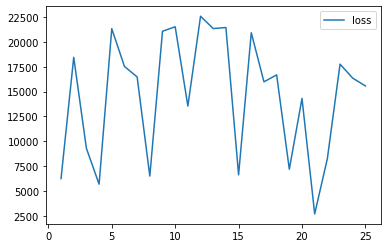

In [20]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

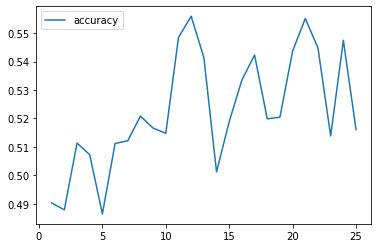

In [21]:
 history_df.plot(y="accuracy")

In [22]:
#refining the model
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                880       
                                                                 
 dense_4 (Dense)             (None, 15)                315       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,366
Trainable params: 1,366
Non-trainable params: 0
_________________________________________________________________


In [23]:
 # Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5311
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5324
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5324
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5324
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5302
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5324
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5324
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5309
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accura

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6899 - accuracy: 0.5324 - 755ms/epoch - 3ms/step
Loss: 0.689866840839386, Accuracy: 0.5323615074157715


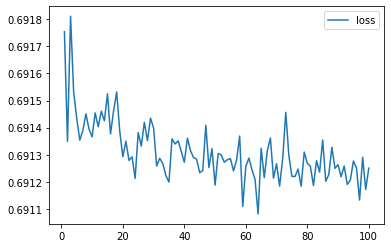

In [25]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

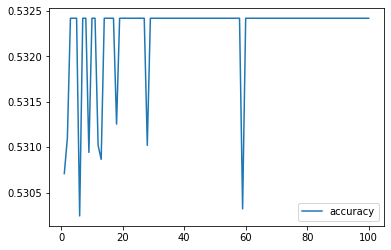

In [26]:
 history_df.plot(y="accuracy")

In [27]:
#refining the model
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  75
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 75)                3300      
                                                                 
 dense_8 (Dense)             (None, 25)                1900      
                                                                 
 dense_9 (Dense)             (None, 10)                260       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,471
Trainable params: 5,471
Non-trainable params: 0
_________________________________________________________________


In [28]:
 # Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5296
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5324
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5298
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5324
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accura

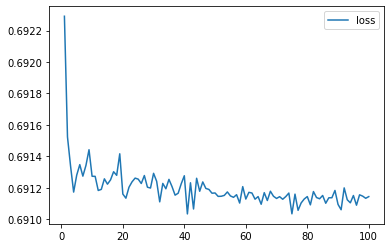

In [29]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

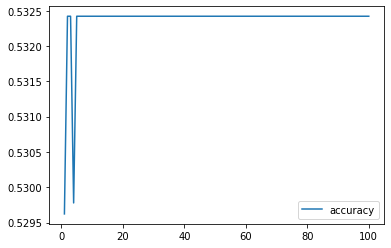

In [30]:
 history_df.plot(y="accuracy")

In [31]:
#refining the model
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               4400      
                                                                 
 dense_12 (Dense)            (None, 35)                3535      
                                                                 
 dense_13 (Dense)            (None, 15)                540       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 8,491
Trainable params: 8,491
Non-trainable params: 0
_________________________________________________________________


In [32]:
 # Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6915 - accuracy: 0.5310
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5313
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5306
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5311
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5324
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5309
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5324
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6914 - accura

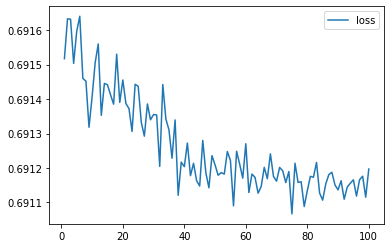

In [33]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

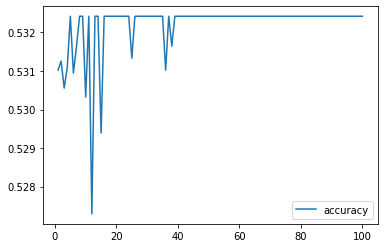

In [34]:
 history_df.plot(y="accuracy")

In [35]:
# Export our model to HDF5 file
nn.save("CharityModel.h5")